In [1]:
# Load packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6) 
from subprocess import check_output
print(check_output(["ls", "./hillary-clinton-emails"]).decode("utf8"))

Populating the interactive namespace from numpy and matplotlib
Aliases.csv
EmailReceivers.csv
Emails.csv
hashes.txt
Persons.csv



# Part I

In [28]:
#Lets load the hillary clinton mails
path = "./hillary-clinton-emails/"
aliases = pd.read_csv(path + 'Aliases.csv')
emReceivers = pd.read_csv(path + 'EmailReceivers.csv')
emails = pd.read_csv(path + 'Emails.csv')
persons = pd.read_csv(path + 'Persons.csv')
hashes = pd.read_table(path + 'hashes.txt')

In [3]:
aliases.sample(10)

,Id,Alias,PersonId
65,66,mills. cheryl d,32
520,521,sullivanij@state.gov.,282
336,337,recos,175
446,447,miliscd@stategov,237
622,623,otero mildred (clinton),377
116,117,brimmere@state.gov,66
269,270,otero maria,135
762,763,sbvvhoeop,194
469,470,suilivanij@state.gok,247
44,45,adler caroline e,24


In [4]:
emReceivers.sample(10)

,Id,EmailId,PersonId
4304,4305,3604,80
2699,2700,2174,80
2659,2660,2137,80
2117,2118,1627,80
1908,1909,1453,80
8015,8016,6903,87
1498,1499,1117,185
8974,8975,7668,80
7191,7192,6166,80
1889,1890,1434,116


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7845b2ee10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f78467ffa58>]], dtype=object)

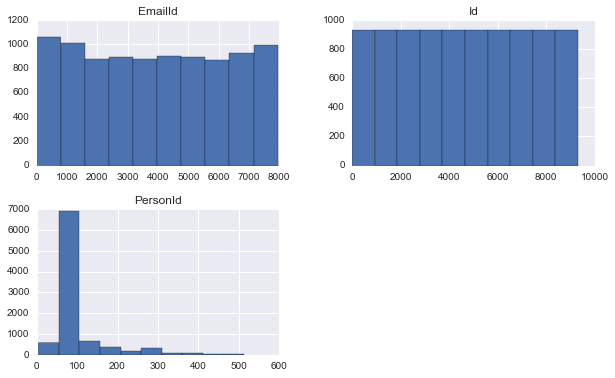

In [5]:
emReceivers.hist()

In [6]:
emails.ix[:, :10]

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841
5,6,C05739559,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739559...,F-2015-04841
6,7,C05739560,"ANTI-MUSLIM FILM DIRECTOR IN HIDING, FOLLOWING...",H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739560...,F-2015-04841
7,8,C05739561,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739561...,F-2015-04841
8,9,C05739562,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739562...,F-2015-04841
9,10,C05739563,MORE ON LIBYA,H,NaN,NaN,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739563...,F-2015-04841


In [7]:
emails.ix[:, 10:]

,MetadataDocumentClass,ExtractedSubject,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,HRC_Email_296,FW: Wow,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,HRC_Email_296,Re: Chris Stevens,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,HRC_Email_296,FVV: Cairo Condemnation - Final,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
5,HRC_Email_296,Meet The Right Wing Extremist Behind Anti-Musl...,NaN,NaN,NaN,"Wednesday, September 12, 2012 01:00 PM",F-2015-04841,C05739559,05/13/2015,RELEASE IN PART,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
6,HRC_Email_296,"FW: Anti-Muslim film director in hiding, follo...",NaN,"Mills, Cheryl D <MillsCD@state.gov>",NaN,"Wednesday, September 12, 2012 4:00 PM",F-2015-04841,C05739560,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
7,HRC_Email_296,NaN,NaN,NaN,NaN,NaN,F-2015-04841,C05739561,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.corn>\nFriday, March 11...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...
8,HRC_Email_296,FVV: Secretary's remarks,NaN,"Sullivan, Jacob J <Sullivanli@stategov>",NaN,"Wednesday, September 12, 2012 6:08 PM",F-2015-04841,C05739562,05/13/2015,RELEASE IN FULL,FYI,UNCLASSIFIED\nU.S. Department of State\nCase N...
9,HRC_Email_296,more on Libya,NaN,NaN,NaN,NaN,F-2015-04841,C05739563,05/13/2015,RELEASE IN PART,"B6\nWednesday, September 12, 2012 6:16 PM\nFwd...",UNCLASSIFIED\nU.S. Department of State\nCase N...


In [8]:
# we are interested about RawText so we don't care about Nan
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7945 entries, 0 to 7944
Data columns (total 22 columns):
Id                              7945 non-null int64
DocNumber                       7945 non-null object
MetadataSubject                 7649 non-null object
MetadataTo                      7690 non-null object
MetadataFrom                    7788 non-null object
SenderPersonId                  7788 non-null float64
MetadataDateSent                7813 non-null object
MetadataDateReleased            7945 non-null object
MetadataPdfLink                 7945 non-null object
MetadataCaseNumber              7945 non-null object
MetadataDocumentClass           7945 non-null object
ExtractedSubject                6260 non-null object
ExtractedTo                     3288 non-null object
ExtractedFrom                   6692 non-null object
ExtractedCc                     2640 non-null object
ExtractedDateSent               6628 non-null object
ExtractedCaseNumber             7944 non-null

In [9]:
emails.RawText.values

array([ 'UNCLASSIFIED\nU.S. Department of State\nCase No. F-2015-04841\nDoc No. C05739545\nDate: 05/13/2015\nSTATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.\nSUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER.\nRELEASE IN FULL\nFrom: Sullivan, Jacob J <Sullivan11@state.gov>\nSent: Wednesday, September 12, 2012 10:16 AM\nTo:\nSubject: FW: Wow\nFrom: Brose, Christian (Armed Services) (mailto:Christian_Brose@armed-servic,essenate.govi\nSent: Wednesday, September 12, 2012 10:09 AM\nTo: Sullivan, Jacob J\nSubject: Wow\nWhat a wonderful, strong and moving statement by your boss. please tell her how much Sen. McCain appreciated it. Me\ntoo\nUNCLASSIFIED\nU.S. Department of State\nCase No. F-2015-04841\nDoc No. C05739545\nDate: 05/13/2015\nSTATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.\nSUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER. STATE-5CB0045247\n\x0c',
       "UNCLASSIFIED\nU.S. Department of State\nCase No. F-2015-04841\nD

In [10]:
persons.sample(5)

,Id,Name
179,180,Richard Verma
113,114,L. Rosenberger
204,205,Tomicah Tillemann
431,432,kritenbrink daniel j
190,191,"Samuel (""Sandy"") Berger"


In [11]:
totalTexts = emails.RawText.values
wholeText = ' '.join(totalTexts)

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/nevena/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import re
def preprocessing(text):
    text = re.sub('[^a-zA-Z0-9 \n]', '', text.lower())
    text = re.sub(r'(  +|\n)', " ", text)
    text = re.sub(r'(^(  ?)|(  ?)$)', "", text)
    stop_words_bis = set(['@', 'http', 'www', 'Fwd', 'Re', 'To', 'Sent', 'Doc', 'Subject', 'Fw', 'Cc', 'Doc', 'PM', 'AM', \
                             'RELEASE', 'PART', 'IN', 'FULL', 'B6', 'Original', 'Message', 'No', 'Date', 'Case',\
                         'unclassified', 'of', 'State'])   
    stop_words_bis.update(stopwords)
    text = ' '.join(word for word in text.split(' ')  if ( (not word in stop_words_bis))) 
    return text.lower()

In [14]:
wholeText = preprocessing(wholeText)

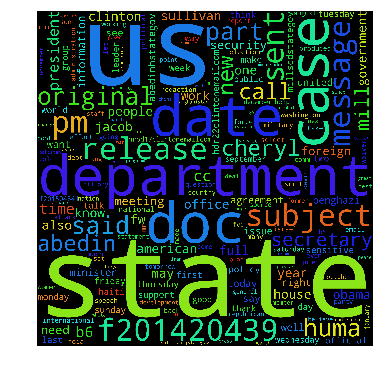

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from os import path
from PIL import Image

wc = WordCloud(width=5000, height=5000, stopwords=STOPWORDS)
wc.generate(wholeText)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [16]:
#Tokenizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
#Stemming method
porter = PorterStemmer()
def tokenizer_stemming(tweet):
    return [porter.stem(word) for word in tweet.split()]
#lemmatization methdod
lemmatizer = WordNetLemmatizer()
def tokenizer_lemma(tweet):
    return [lemmatizer.lemmatize(word) for word in tweet.split()]

In [17]:
tokenizer_lemma('said') # WTF he shoud output say instead of said so guys verify if your lemmatizer works

['said']

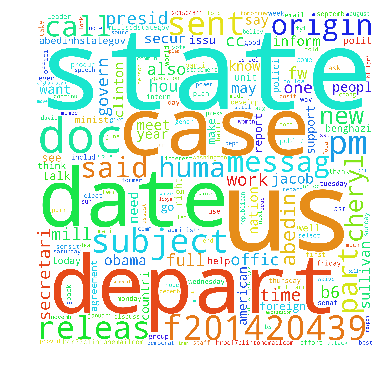

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


#troll_mask = np.array(Image.open(path.join("/Users/Sam/Desktop/3rd-Semester/Applied-Data-Analytics/Labs/Labs/05 - Taming Text", "troll.png")))

wholeText_stemmed = tokenizer_stemming(wholeText)
wc = WordCloud(background_color="white", width=5000, height=5000,stopwords=STOPWORDS)
wc.generate(' '.join(wholeText_stemmed))
plt.imshow(wc)
plt.axis("off")
plt.show()

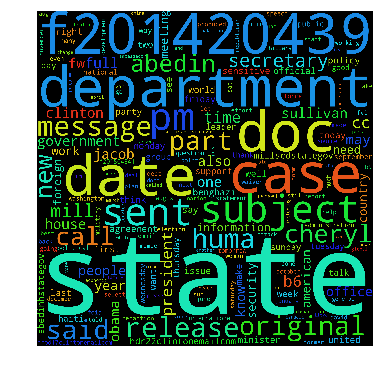

In [20]:
wholeText_lemmatized = tokenizer_lemma(wholeText)
wc = WordCloud(width=5000, height=5000, stopwords=STOPWORDS)
wc.generate(' '.join(wholeText_lemmatized))
plt.imshow(wc)
plt.axis("off")
plt.show()

# Problem 2

### Country mentions

In [21]:
import pycountry

In [22]:
countries = []
for country in pycountry.countries:
    #abr=country.alpha_2
    name=country.name.lower()
    # c=wholeText.count(abr)+wholeText.lower().count(name)
    c=wholeText.lower().count(name)
    countries.extend([[name,c]])

In [23]:
countries.sort(key=lambda x: x[1],reverse=True)


In [24]:
df=pd.DataFrame(countries).set_index(0)

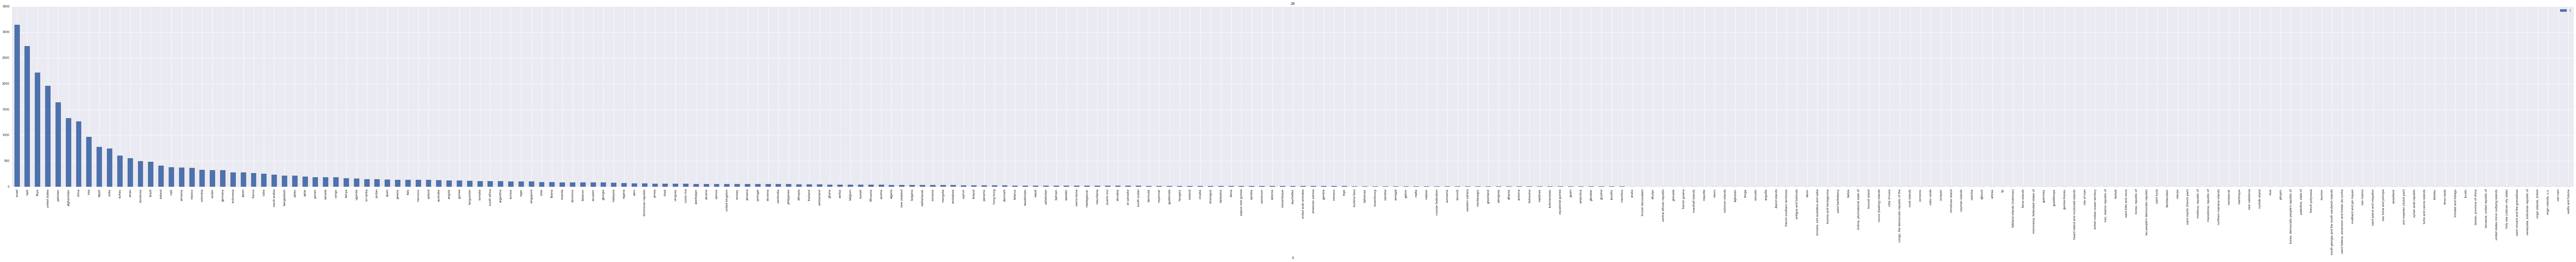

In [25]:
df.plot(kind='bar', figsize=(142, 10), title=c)

### Sentiment analysis

In [26]:
from nltk.sentiment.util import demo_liu_hu_lexicon

In [29]:
emails=emails.dropna()

In [30]:
def liu_hu_lexicon(sentence):
    from nltk.corpus import opinion_lexicon
    from nltk.tokenize import treebank

    tokenizer = treebank.TreebankWordTokenizer()
    pos_words = 0
    neg_words = 0
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(sentence)]

    x = list(range(len(tokenized_sent))) # x axis for the plot
    y = []

    for word in tokenized_sent:
        if word in opinion_lexicon.positive():
            pos_words += 1
            y.append(1) # positive
        elif word in opinion_lexicon.negative():
            neg_words += 1
            y.append(-1) # negative
        else:
            y.append(0) # neutral

    if pos_words > neg_words:
        return 'Positive'
    elif pos_words < neg_words:
        return 'Negative'
    elif pos_words == neg_words:
        return 'Neutral'

In [31]:
emails['sentiment']=emails['ExtractedBodyText'].map(lambda x: liu_hu_lexicon(x))

In [33]:
def mentioned_countries(text):
    countries = []
    for country in pycountry.countries:
        abr=country.alpha_2
        name=country.name.lower()
        c=text.count(abr)+text.lower().count(name)
        if c>0: 
            countries.extend([name])
    return countries

In [34]:
emails['countries']=emails['ExtractedBodyText'].map(lambda x: " ".join(mentioned_countries(x)))

In [85]:
countries_in_emails=list(set(np.hstack(emails['countries'].values)))

In [35]:
country_names = []
positives=[]
negatives=[]
neutrals=[]
for country in pycountry.countries:
    name=country.name.lower()
    cont=emails.loc[emails['countries'].str.contains(name)]
    positive=cont.loc[emails['sentiment']=="Positive"].shape[0]
    negative=cont.loc[emails['sentiment']=="Negative"].shape[0]
    neutral=cont.loc[emails['sentiment']=="Neutral"].shape[0]
    country_names.extend([name])
    positives.extend([positive])
    negatives.extend([negative])
    neutrals.extend([neutral])
country_names,positives,negatives,neutrals

/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


(['aruba',
  'afghanistan',
  'angola',
  'anguilla',
  'åland islands',
  'albania',
  'andorra',
  'united arab emirates',
  'argentina',
  'armenia',
  'american samoa',
  'antarctica',
  'french southern territories',
  'antigua and barbuda',
  'australia',
  'austria',
  'azerbaijan',
  'burundi',
  'belgium',
  'benin',
  'bonaire, sint eustatius and saba',
  'burkina faso',
  'bangladesh',
  'bulgaria',
  'bahrain',
  'bahamas',
  'bosnia and herzegovina',
  'saint barthélemy',
  'belarus',
  'belize',
  'bermuda',
  'bolivia, plurinational state of',
  'brazil',
  'barbados',
  'brunei darussalam',
  'bhutan',
  'bouvet island',
  'botswana',
  'central african republic',
  'canada',
  'cocos (keeling) islands',
  'switzerland',
  'chile',
  'china',
  "côte d'ivoire",
  'cameroon',
  'congo, the democratic republic of the',
  'congo',
  'cook islands',
  'colombia',
  'comoros',
  'cabo verde',
  'costa rica',
  'cuba',
  'curaçao',
  'christmas island',
  'cayman islands',
  

In [36]:
sent_per_country=pd.DataFrame({'country':country_names,'positives':positives, 'neutrals':neutrals,'negatives':negatives})

In [37]:
sent_per_country=sent_per_country.set_index("country")

In [38]:
frame1=df.sort_index()

In [39]:
frame2=sent_per_country.sort_index()

In [87]:
countries_sent=frame2.join(frame1)

,negatives,neutrals,positives,1
country,,,,
afghanistan,0,1,4,1329
albania,0,2,2,4
algeria,0,0,0,33
american samoa,0,20,9,9
andorra,0,0,1,4
angola,0,0,1,121
anguilla,1,1,5,0
antarctica,0,0,0,2
antigua and barbuda,0,0,3,0


In [88]:
countries_sent['score']=(countries_sent['positives']-countries_sent['negatives'])/(countries_sent['positives']+countries_sent['negatives'])

In [90]:
countries_sent=countries_sent.dropna()

In [93]:
def plot_(countries_sent, score):
    # Credits to Stack Overflow :
    # http://stackoverflow.com/questions/31313606/pyplot-matplotlib-bar-chart-with-fill-color-depending-on-value
    from matplotlib import cm

    # Set up colors : red to green
    y = np.array(countries_sent[score])
    colors = cm.RdYlGn(y / float(max(y)))
    plot = plt.scatter(y, y, c=y, cmap = 'RdYlGn')
    plt.clf()
    clb = plt.colorbar(plot)
    clb.ax.set_title("Sentiment")

    # Display bar plot : country frequency vs. country name, with color indicating polarity score
    plt.bar(range(countries_sent.shape[0]), countries_sent[countries_sent.columns.values[3]], align='center', tick_label=countries_sent.index, color=colors)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Country")
    plt.ylabel("Frequency")
    plt.show()

In [81]:
from nltk.sentiment import SentimentIntensityAnalyzer

emails['vader_score']= emails['ExtractedBodyText'].map(lambda x: vader_analyzer.polarity_scores(x)['compound'])

In [96]:
country_names = []
scores=[]
for country in pycountry.countries:
    name=country.name.lower()
    cont=emails.loc[emails['countries'].str.contains(name)]
    score=cont['vader_score'].sum()
    count=cont['vader_score'].count()
    country_names.extend([name])
    scores.extend([score/count])
country_names,scores
vald_sent_per_country=pd.DataFrame({'country':country_names,'vader_score':scores})
vald_sent_per_country=vald_sent_per_country.set_index('country')
fullFrame=countries_sent.join(vald_sent_per_country)


/home/nevena/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


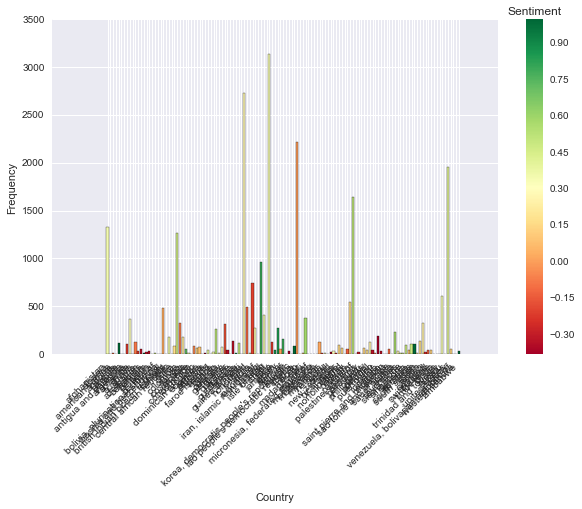

In [97]:
plot_(fullFrame,'vader_score')

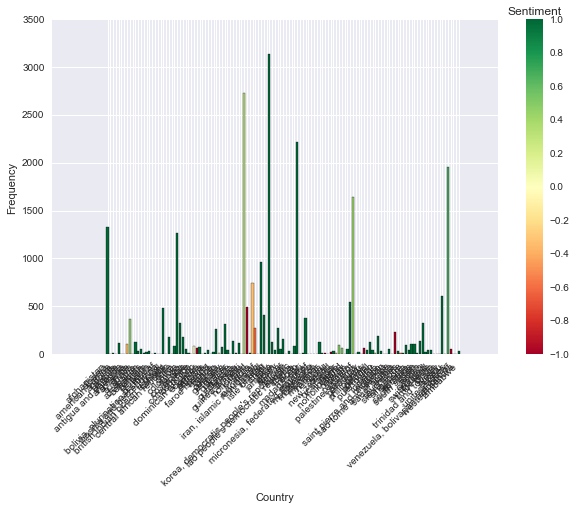

In [95]:
plot_(fullFrame,'score')

### Topic modeling

In [77]:
import gensim

In [81]:
from gensim.utils import smart_open, simple_preprocess
from gensim.corpora.wikicorpus import _extract_pages, filter_wiki
from gensim.parsing.preprocessing import STOPWORDS

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

def iter_wiki(dump_file):
    """Yield each article from the Wikipedia dump, as a `(title, tokens)` 2-tuple."""
    ignore_namespaces = 'Wikipedia Category File Portal Template MediaWiki User Help Book Draft'.split()
    for title, text, pageid in _extract_pages(smart_open(dump_file)):
        text = filter_wiki(text)
        tokens = tokenize(text)
        if len(tokens) < 50 or any(title.startswith(ns + ':') for ns in ignore_namespaces):
            continue  # ignore short articles and various meta-articles
        yield title, tokens

In [85]:
doc_stream = (tokens for tokens in totalTexts)
id2word_wiki = gensim.corpora.Dictionary(doc_stream)
clipped_corpus = gensim.utils.ClippedCorpus(wholeText, 4000)  # use fewer documents during training, LDA is slow
# ClippedCorpus new in gensim 0.10.1
# copy&paste it from https://github.com/piskvorky/gensim/blob/0.10.1/gensim/utils.py#L467 if necessary (or upgrade your gensim)
%time lda_model = gensim.models.LdaModel(clipped_corpus, num_topics=10, id2word=id2word_wiki, passes=4)

TypeError: doc2bow expects an array of unicode tokens on input, not a single string